
# 📊 SOLAQUA - Synchronized Sonar & Net Distance Analysis (Simplified)

**Clean, streamlined analysis using utility functions**

This notebook provides a simplified interface for analyzing synchronized sonar and navigation distance measurements using modularized utility functions.

### Key Features:
- **🎛️ Simple Configuration**: Just change the bag name and frame index
- **⚡ Fast Loading**: Optimized data loading with utility functions
- **🎯 Clean Visualization**: Professional sonar visualizations with distance overlays
- **📊 Automated Analysis**: Statistical analysis and measurement comparison
- **🔄 Easy Bag Switching**: Change bags without code duplication

### Usage:
1. Set your target bag in the configuration section
2. Run the analysis cells
3. View synchronized sonar and distance measurements

---

In [1]:
# 🔧 SETUP AND IMPORTS
# ===================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import importlib
import warnings

# Import SOLAQUA utilities
import utils.sonar_distance_analysis as sda
import utils.sonar_utils as sonar_utils

# Force reload utilities to get latest changes
importlib.reload(sda)
importlib.reload(sonar_utils)

# Configuration
warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (16, 12)

print("✅ All libraries imported and utilities loaded!")
print("🚀 Ready for streamlined sonar distance analysis!")

✅ All libraries imported and utilities loaded!
🚀 Ready for streamlined sonar distance analysis!


## 🎛️ Configuration

**Change these parameters to switch bags and frames:**

In [8]:
# 🎯 ANALYSIS CONFIGURATION
# =========================
# **CHANGE THESE PARAMETERS TO SWITCH ANALYSIS TARGET**

TARGET_BAG = "2024-08-20_13-39-34"  # 🔄 Change this to switch bags
FRAME_INDEX = 500                     # 🔄 Change this to switch frames
EXPORTS_FOLDER = "/Users/eirikvarnes/code/SOLAQUA/exports"

print(f"🎯 Analysis Configuration:")
print(f"   📁 Target Bag: {TARGET_BAG}")
print(f"   🖼️  Frame Index: {FRAME_INDEX}")
print(f"   📂 Exports Folder: {EXPORTS_FOLDER}")
print(f"\n🔄 To change analysis target, modify variables above and re-run")

🎯 Analysis Configuration:
   📁 Target Bag: 2024-08-20_13-39-34
   🖼️  Frame Index: 500
   📂 Exports Folder: /Users/eirikvarnes/code/SOLAQUA/exports

🔄 To change analysis target, modify variables above and re-run


## 📡 Data Loading

Load all distance measurement data for the configured bag:

In [9]:
# 📡 LOAD ALL DISTANCE DATA FOR TARGET BAG
# ========================================

print(f"📡 Loading all distance data for bag: {TARGET_BAG}")
print("=" * 60)

# Load all data using utility function
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Extract individual datasets for easy access
nav_data = raw_data['navigation']
guidance_data = raw_data['guidance']

print(f"\n✅ Data loading complete!")
print(f"   📊 Navigation records: {len(nav_data) if nav_data is not None else 0}")
print(f"   📊 Guidance records: {len(guidance_data) if guidance_data is not None else 0}")
print(f"   📊 Distance sensors: {len(distance_measurements)}")

if distance_measurements:
    print(f"\n📏 Available distance measurements:")
    for name, info in distance_measurements.items():
        print(f"   • {name}: {info['description']}")

📡 Loading all distance data for bag: 2024-08-20_13-39-34
🎯 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-20_13-39-34
📡 1. Loading Navigation Data...
   ✅ Loaded 311 navigation records
📡 2. Loading Guidance Data...
   ✅ Loaded 293 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
   ❌ DVL altimeter file not found
📡 4. Loading USBL...
   ✅ Loaded 21 USBL records
📡 5. Loading DVL Position...
   ✅ Loaded 157 DVL position records
📡 6. Loading Navigation Position...
   ✅ Loaded 153 navigation position records
📡 7. Loading INS Z Position...
   ❌ INS file not found

📊 LOADING SUMMARY:
   🎯 Target bag: 2024-08-20_13-39-34
   📁 Raw data loaded: 2/2
   📏 Distance measurements: 4

✅ Data loading complete!
   📊 Navigation records: 311
   📊 Guidance records: 293
   📊 Distance sensors: 4

📏 Available distance measurements:
   • USBL_3D: 3D acoustic position
   • USBL_Depth: USBL depth measurement
   • DVL_Position: 3D DVL position
   •

## 🎯 Sonar Visualization

Create professional sonar visualization with synchronized distance measurements:

🎯 Creating sonar visualization...
🎯 CREATING SONAR VISUALIZATION FOR BAG: 2024-08-20_13-39-34
📊 Frame: 500


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


📡 Loaded 699 sonar frames for bag 2024-08-20_13-39-34
   🕐 Time: 11:40:10
   📐 Sonar extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)

📏 Found 4 distance measurements:
   📏 Navigation NetDistance: 1.860m (Primary navigation measurement)
   📏 Desired Distance: 1.000m (Target/desired distance)
   📏 Guidance Error: 0.860m (Navigation error distance)
   📏 USBL_3D: 9.017m (3D acoustic position)

✅ Visualization complete for bag: 2024-08-20_13-39-34


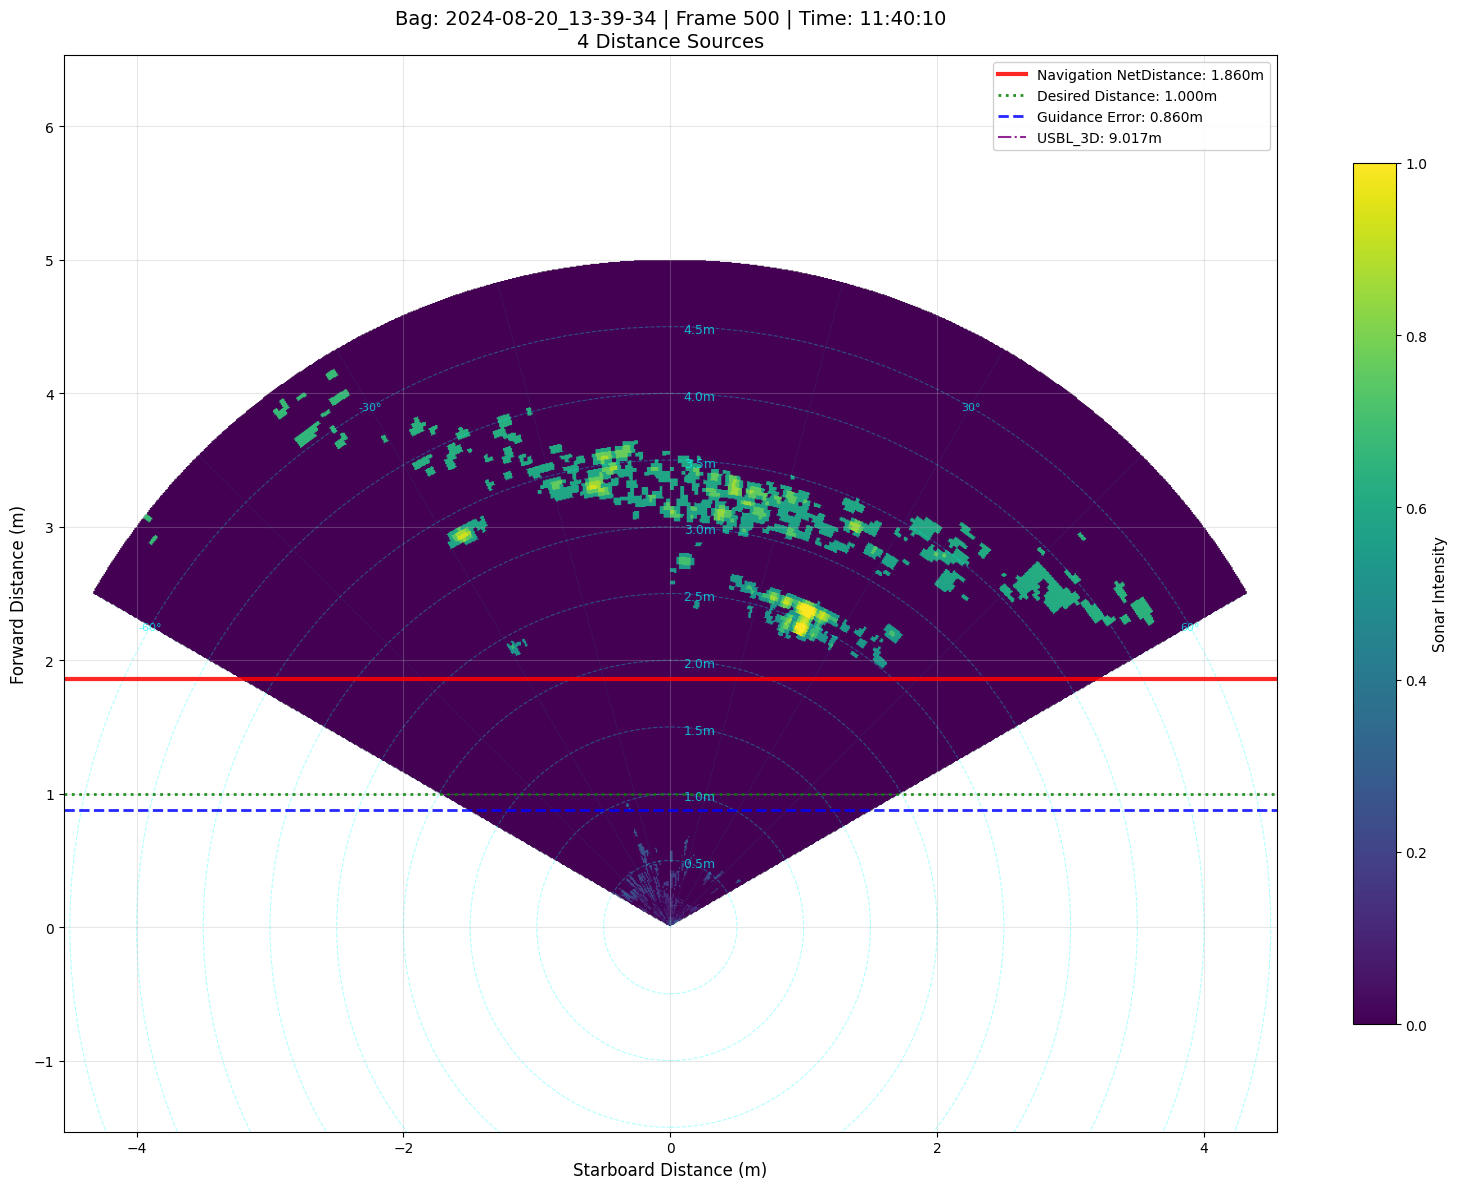


🎯 Visualization complete!
   📍 Red line: Primary navigation measurement
   📍 Green line: Desired/target distance
   📍 Blue line: Navigation error
   📍 Other lines: Additional sensor measurements
   📍 Cyan rings: Distance reference (0.5m intervals)


In [10]:
# 🎯 CREATE SONAR VISUALIZATION
# =============================

print(f"🎯 Creating sonar visualization...")

# Create visualization using utility function
fig = sda.create_sonar_visualization(
    target_bag=TARGET_BAG,
    frame_idx=FRAME_INDEX,
    raw_nav_data=nav_data,
    raw_guidance_data=guidance_data,
    distance_measurements=distance_measurements,
    exports_folder=EXPORTS_FOLDER,
    figsize=(16, 12)
)

if fig:
    plt.show()
    print(f"\n🎯 Visualization complete!")
    print(f"   📍 Red line: Primary navigation measurement")
    print(f"   📍 Green line: Desired/target distance")
    print(f"   📍 Blue line: Navigation error")
    print(f"   📍 Other lines: Additional sensor measurements")
    print(f"   📍 Cyan rings: Distance reference (0.5m intervals)")
else:
    print(f"❌ Visualization failed - check configuration and data availability")

## 📊 Quick Analysis

Perform quick statistical analysis of the current frame:

In [5]:
# 📊 QUICK STATISTICAL ANALYSIS
# =============================

print(f"📊 Performing quick analysis for frame {FRAME_INDEX}...")
print("=" * 50)

# Get sonar timestamp for this frame
sonar_csv_file = Path(EXPORTS_FOLDER) / "by_bag" / f"sensor_sonoptix_echo_image__{TARGET_BAG}_video.csv"

if sonar_csv_file.exists():
    sonar_df = pd.read_csv(sonar_csv_file)
    
    if FRAME_INDEX < len(sonar_df):
        sonar_timestamp = pd.to_datetime(sonar_df.loc[FRAME_INDEX, 'ts_utc'])
        
        # Collect distance measurements for this timestamp
        distance_data = sda.collect_distance_measurements_at_timestamp(
            sonar_timestamp, nav_data, guidance_data, distance_measurements
        )
        
        # Analyze the measurements
        analysis = sda.analyze_distance_measurements(distance_data)
        
        print(f"🕐 Frame {FRAME_INDEX} timestamp: {sonar_timestamp.strftime('%H:%M:%S')}")
        print(f"📏 Found {len(distance_data)} synchronized measurements")
        
        # Basic statistics
        if 'basic_stats' in analysis:
            stats = analysis['basic_stats']
            print(f"\n📊 MEASUREMENT STATISTICS:")
            print(f"   Range: {stats['min']:.3f}m to {stats['max']:.3f}m")
            print(f"   Spread: {stats['range']:.3f}m")
            print(f"   Mean: {stats['mean']:.3f}m ± {stats['std']:.3f}m")
        
        # Offset analysis
        if 'offset_analysis' in analysis and analysis['offset_analysis']:
            ref_dist = analysis['offset_analysis']['reference']
            offsets = analysis['offset_analysis']['offsets']
            
            print(f"\n🎯 OFFSET ANALYSIS (vs Navigation NetDistance {ref_dist:.3f}m):")
            for name, offset in offsets.items():
                emoji = "🧭" if "INS" in name else "📏"
                print(f"   {emoji} {name}: {offset:+.3f}m")
        
        # Clustering analysis
        if 'clustering' in analysis and analysis['clustering']:
            print(f"\n🔍 CLOSE MEASUREMENTS (within 10cm):")
            for name1, name2, diff in analysis['clustering']:
                print(f"   📌 {name1} ↔ {name2}: {diff:.3f}m difference")
        else:
            print(f"\n🔍 No measurements within 10cm of each other")
        
        # INS analysis
        if 'ins_analysis' in analysis and analysis['ins_analysis']:
            print(f"\n🧭 INS MEASUREMENTS:")
            for name, data in analysis['ins_analysis'].items():
                print(f"   🧭 {name}: {data['value']:.3f}m ({data['description']})")
        
    else:
        print(f"❌ Frame {FRAME_INDEX} not available (only {len(sonar_df)} frames)")
else:
    print(f"❌ Sonar data file not found for bag {TARGET_BAG}")

print(f"\n✅ Quick analysis complete!")

📊 Performing quick analysis for frame 500...
🕐 Frame 500 timestamp: 12:29:39
📏 Found 7 synchronized measurements

📊 MEASUREMENT STATISTICS:
   Range: -0.030m to 7.563m
   Spread: 7.593m
   Mean: 2.386m ± 2.380m

🎯 OFFSET ANALYSIS (vs Navigation NetDistance 0.570m):
   📏 Desired Distance: +0.030m
   📏 Guidance Error: -0.600m
   📏 USBL_3D: +6.993m
   📏 DVL_Position: +2.318m
   📏 Nav_Position: +2.313m
   🧭 INS_Z_Position: +1.658m

🔍 CLOSE MEASUREMENTS (within 10cm):
   📌 Navigation NetDistance ↔ Desired Distance: 0.030m difference
   📌 DVL_Position ↔ Nav_Position: 0.005m difference

🧭 INS MEASUREMENTS:
   🧭 INS_Z_Position: 2.228m (INS positionFrame.z (vertical position) (abs value))

✅ Quick analysis complete!


## 🔍 Measurement Search

Search for additional measurement types in the bag files:

In [6]:
# 🔍 SEARCH FOR ADDITIONAL MEASUREMENTS
# ====================================

print(f"🔍 Searching for measurement columns in bag {TARGET_BAG}...")

# Search using utility function
findings = sda.search_csv_files_for_measurements(TARGET_BAG, EXPORTS_FOLDER)

print(f"\n📋 SEARCH RESULTS:")
print("=" * 30)

for category, files in findings.items():
    if files:
        print(f"\n📏 {category.upper()} MEASUREMENTS:")
        for file_name, columns in files.items():
            # Clean up file name for display
            clean_name = file_name.replace(f'__{TARGET_BAG}_data', '').replace(f'__{TARGET_BAG}_video', '')
            print(f"   📁 {clean_name}:")
            for col in columns[:5]:  # Show first 5 columns
                print(f"      • {col}")
            if len(columns) > 5:
                print(f"      ... and {len(columns)-5} more columns")

print(f"\n✅ Search complete!")

🔍 Searching for measurement columns in bag 2024-08-22_14-29-05...
🔍 Searching 31 CSV files for bag 2024-08-22_14-29-05...

📊 Search Summary:
   📁 Files searched: 31
   📋 Files with findings: 31
   📏 Net measurements: 4 files
   📏 Distance measurements: 6 files
   📏 Depth measurements: 5 files
   📏 Position measurements: 31 files
   📏 Altitude measurements: 4 files

📋 SEARCH RESULTS:

📏 NET MEASUREMENTS:
   📁 guidance:
      • error_net_distance
      • desired_net_distance
      • r_net_distance_d
   📁 gui_netFollowing_manager:
      • d_net_distance
      • d_net_velocity_horizontal
      • d_net_velocity_vertical
      • offset_net_heading
   📁 navigation_plane_approximation:
      • NetDistance
      • NetHeading
      • NetPitch
      • NetLock
      • NetVelocity_u
      ... and 2 more columns
   📁 nucleus1000dvl_magnetometer:
      • magnetometer.x
      • magnetometer.y
      • magnetometer.z
      • magnetometer.__msgtype__

📏 DISTANCE MEASUREMENTS:
   📁 nucleus1000dvl_watertra

## 📋 SOLAQUA Dataset Information

### 🌊 Dataset Overview
This dataset contains ROV data, navigation data, mono camera and stereo camera data from multiple sea trials conducted at **full-scale fish farms**. 

### 📊 Available Sensor Data:
- **IMU** (Inertial Measurement Unit)
- **Gyroscope** 
- **DVL** (Doppler Velocity Log)
- **USBL** (Ultra-Short Baseline positioning)
- **Multibeam sonar**
- **Ping 360 sonar**
- **Mono camera**
- **Stereo camera**
- **Depth sensor**
- **Pressure sensor**
- **Temperature sensor**

### 📷 Calibration & Manual Control Sessions (2024-08-20):
| Filename | Action | Available |
|----------|--------|-----------|
| `2024-08-20_13-39-34` | **Stereo camera calibration** | ✅ **In workspace** |
| `2024-08-20_13-40-35` | **Stereo camera calibration** | ✅ **In workspace** |
| `2024-08-20_13-42-51` | Stereo camera calibration | ❌ Not available |
| `2024-08-20_13-55-34` | Manual control - shallow | ❌ Not available |
| `2024-08-20_13-57-42` | Manual control - shallow | ❌ Not available |
| `2024-08-20_14-16-05` | Manual control - deeper | ❌ Not available |
| `2024-08-20_14-22-12` | Manual control - deeper | ❌ Not available |
| `2024-08-20_14-24-35` | Manual control - deeper | ❌ Not available |
| `2024-08-20_14-31-29` | Manual control - shallow | ❌ Not available |

### 🎯 Net Following Experiments (2024-08-20):
**Datasets from `2024-08-20_14-34-07` to `2024-08-20_18-52-15`**
*Net following performed with varying net distances, depths and velocities*

#### Parameter Definitions:
- **D0**: Initial desired distance to net [m]
- **D1**: Final desired distance to net [m]  
- **Z**: Depth [m]
- **V**: Net-relative velocity [m/s], horizontal
- **Q**: Heading-angle offset from net [deg]

#### 🔴 Inconsistent Net Distance Datasets:
| Filename | D0 | D1 | Z | V | Q | Available |
|----------|----|----|---|---|---|-----------|
| `2024-08-20_13-39-34` | 1.5 | 1.5 | 2 | 0.2 | 0 | ✅ **In workspace** |
| `2024-08-20_13-40-35` | 1.5 | 1.5 | 2 | 0.2 | 0 | ✅ **In workspace** |
| `2024-08-20_14-38-37` | 2.0 | 2.0 | 2 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_14-49-47` | 2.0 | 2.0 | 2 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_14-54-52` | 2.0 | 2.0 | 2 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_14-57-38` | 2.0 | 1.1 | 2 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_15-00-24` | 1.5 | 1.5 | 5 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_15-05-53` | 1.0 | 1.5 | 5 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_15-09-34` | 1.5 | varies | 5 | 0.2 | 0 | ❌ Not available |
| `2024-08-20_15-12-51` | 1.5 | 1.0 | 5 | 0.1 | 0 | ❌ Not available |
| `2024-08-20_15-14-40` | 1.4 | 1.9 | 5 | 0.1 | 0 | ❌ Not available |
| `2024-08-20_15-18-27` | 1.4 | 1.4 | 5 | 0.3 | 0 | ❌ Not available |
| `2024-08-20_15-20-29` | 1.4 | 1.4 | 5 | 0.3 | 0 | ❌ Not available |

*Note: Only 2 of 13 inconsistent datasets are available in your workspace*

#### ✅ Consistent Net Distance Datasets:
*47 experiments (2024-08-20_16-34-34 to 2024-08-20_18-52-15) with stable distance measurements - none available in current workspace*

### 🆕 Multi-DVL Datasets (2024-08-22):
**Net Following Horizontal (NFH) experiments with Waterlinked A50 + Nortek Nucleus 1000 DVLs**

| Filename | Description | Available |
|----------|-------------|-----------|
| `2024-08-22_14-06-43` | **NFH, 2m depth, 0.5-1.0m distance, 0.2 m/s speed** | ✅ **In workspace** |
| `2024-08-22_14-29-05` | **NFH, 2m depth, 0.6-0.8m distance, 0.1 m/s speed** | ✅ **In workspace** |
| `2024-08-22_14-47-39` | **NFH, 2m depth, 0.6m constant distance, 0.1 m/s speed** | ✅ **In workspace** |

### ⚠️ Variable Conditions:
| Filename | Description | Available |
|----------|-------------|-----------|
| `2024-08-22_14-50-14` | NFH, changing heading offset and direction | ❌ Not available |

---

## 📁 Your Available Workspace Datasets (5 total):

### 🔴 Calibration/Inconsistent Distance (2 datasets):
1. **`2024-08-20_13-39-34`** - Stereo camera calibration + inconsistent net distance (D0=1.5m, D1=1.5m, Z=2m, V=0.2m/s)
2. **`2024-08-20_13-40-35`** - Stereo camera calibration + inconsistent net distance (D0=1.5m, D1=1.5m, Z=2m, V=0.2m/s)

### 🆕 Multi-DVL Net Following (3 datasets):
3. **`2024-08-22_14-06-43`** - NFH, 2m depth, 0.5-1.0m distance range, 0.2 m/s speed
4. **`2024-08-22_14-29-05`** - NFH, 2m depth, 0.6-0.8m distance range, 0.1 m/s speed  
5. **`2024-08-22_14-47-39`** - NFH, 2m depth, 0.6m constant distance, 0.1 m/s speed

---

---

## 🎛️ Easy Bag Switching

**To analyze a different bag:**
1. Change `TARGET_BAG` in the Configuration cell
2. Optionally change `FRAME_INDEX`
3. Re-run all cells from Configuration onwards

**Available bags:**
- `"2024-08-20_13-39-34"`
- `"2024-08-20_13-40-35"`
- `"2024-08-22_14-06-43"`
- `"2024-08-22_14-29-05"`
- `"2024-08-22_14-47-39"`

**Key Features:**
- ✅ No code duplication
- ✅ Consistent analysis across bags
- ✅ Professional visualizations
- ✅ Automated statistical analysis
- ✅ Easy maintenance and updates

---